In [ ]:
# A number of factors contribute to a hotel booking being fulfilled or Canceled
# The Basic Procedure implemented to achieve the goal of thisresearch are ;

In [ ]:
# 1.Understanding the problem
# 2.Gathering the Data
# 3.Data Cleaning and validation
# 4.Exploratory Data Analysis
# 5.Feature Preprocessing
# 6.Modeling
# 7.Model Evaluation
# 8.Feature Importance
# 9.Model Deployment

In [ ]:
# 1. Understanding the Problem

#The first crucial step for any data science problem is understanding the problem one is trying to solve. It is necessary to  explicitly and accurately define the data problem that is to be solved. This will lay a good foundation for the project.

In [ ]:
# Problem Statement:
# As a data scientist, you are supporting a hotel with a project
# aimed at increasing revenue from their room bookings. They believe that they can
# use data science to help them reduce the number of cancellations. You are to use
# any appropriate methodology to identify what contributes to whether a booking
# will be fulfilled or canceled. The results of your work will be used to reduce the
# chance someone cancels their booking.
# As a data scientist, an in-depth understanding of this problem statement will
# determine the success of the project. After understanding the problem
# statement, the goal of the project has to be defined;

In [ ]:
# Goal:
# 1. To develop/build a system/web app that predicts whether a hotel booking will be Online or Offline Or canceled.

# 2. To determine the factors with high importance in predicting whether a hotelbooking will be fulfilled or canceled

In [ ]:
# 2.1. Gathering the Data

# After determining the end goal, the next step is to gather data that is labeled according to the end goal. The data used for this project was obtained from Kaggle.

In [ ]:
# First, the required libraries were imported;

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [8]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Data Dictionary

# 1.1 Booking_ID: unique identifier of each booking
# 1.2 no_of_adults: Number of adults
# 1.3 no_of_children: Number of Children
# 1.4 no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
# 1.5 no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# 1.6 type_of_meal_plan: Type of meal plan booked by the customer:
# 1.7 required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
# 1.8 room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
# 1.9 lead_time: Number of days between the date of booking and the arrival d
# 1.10 arrival_year: Year of arrival.
# 1.11 arrival_month: Month of arrival date
# 1.12 arrival_date: Date of the month
# 1.13 market_segment_type: Market segment designation.
# 1.14 repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
# 1.15 no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
# 1.16 no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current #booking
# 1.17 avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
# 1.18 no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
# 1.19 booking_status: Flag indicating if the booking was canceled or not.


In [9]:
df.shape

(36275, 19)

In [ ]:
# shape of the dataset
# The dataset has 36275 rows and 19 columns.

In [10]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# 3.3. Data Cleaning and Validation

# Now that the data needed for the project is ready, the next step is to ensure that the data is properly clean and well-validated. 
# Effective data cleaning is a vital part of any data science project. 
# Before any analysis can be done, your data must be void of inconsistencies or errors unless you’re aiming at a flawed result.

In [ ]:
# The first step is to check for null values;

In [11]:
df.isnull().values.any()

False

In [12]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Next, I checked for duplicate rows.

In [13]:
df.duplicated().sum()

0

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

In [ ]:
# The data is void of duplicate rows.

# Next, I described the quantitative columns, to check for any abnormalities.

In [15]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# The code above was used to achieve that.

# Then, I specifically checked the year and date columns to ensure there were no abnormal values.

In [ ]:
# The data spans from 2017 to 2018.

In [17]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [ ]:
# 4. Exploratory Data Analysis

In [18]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [19]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [20]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [21]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [ ]:
# Exploratory Data Analysis

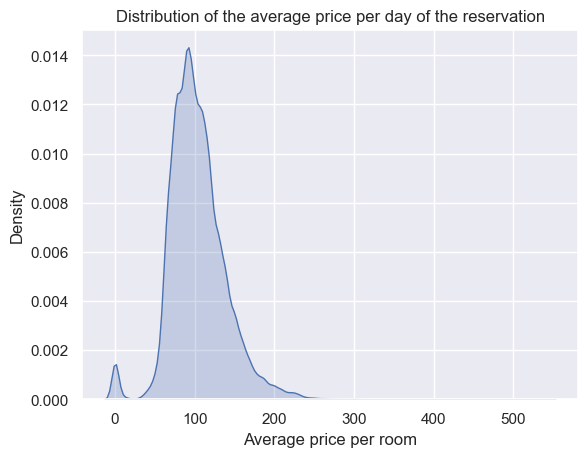

In [23]:
sns.kdeplot(df['avg_price_per_room'], fill=True)
plt.xlabel('Average price per room')
plt.title('Distribution of the average price per day of the reservation')

plt.savefig('price.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# the distribution is approximately right skewed as most of the prices are kind of betwwen 50-200.
# This is kind of okay since the variable is calculated per day.

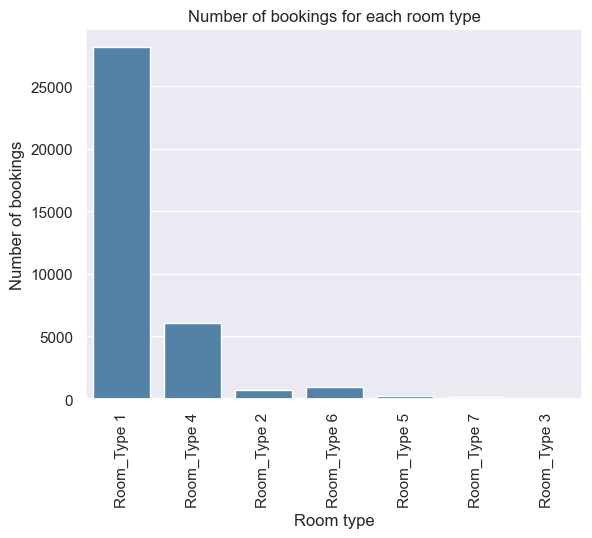

In [24]:
sns.countplot(x='room_type_reserved',data=df, color='steelblue')
plt.xticks(rotation=90)
plt.ylabel('Number of bookings')
plt.xlabel('Room type')
plt.title('Number of bookings for each room type')

plt.savefig('roomtype.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# the room_type 1 has the highest number of bookings with over 20000 bookings.

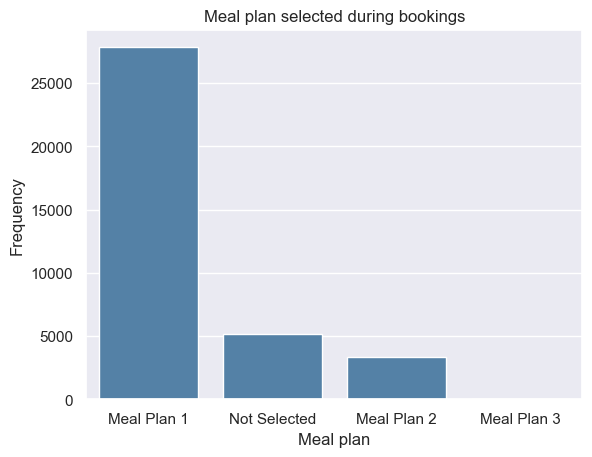

In [25]:
sns.countplot(x='type_of_meal_plan', data=df, color='steelblue')
plt.xlabel('Meal plan')
plt.ylabel('Frequency')
plt.title('Meal plan selected during bookings')

plt.savefig('meal.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# the meal plan 1 was mostly selected during bookings.
# N.B.; the not selected was not filtered out because it's possible to not select a meal plan when making a booking.

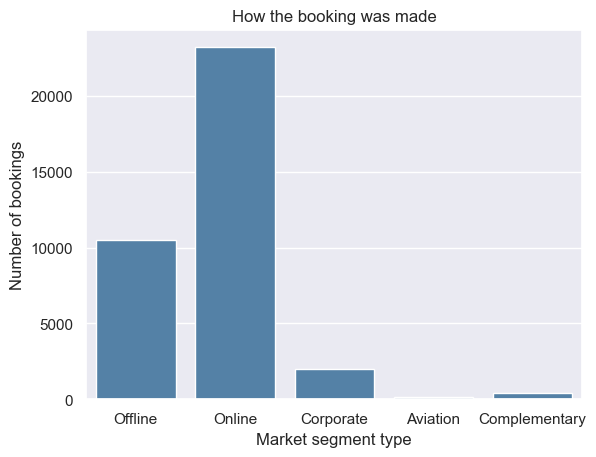

In [26]:
sns.countplot(x='market_segment_type', data=df, color='steelblue')
plt.xlabel('Market segment type')
plt.ylabel('Number of bookings')
plt.title('How the booking was made')

plt.savefig('market.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Most bookings were made online, least is avaiation medium.

In [27]:
car_space_yes = df['required_car_parking_space'].sum()
required_car_space = ['Yes', 'No']
data = [car_space_yes, (len(df)-car_space_yes)]
data

[1124, 35151]

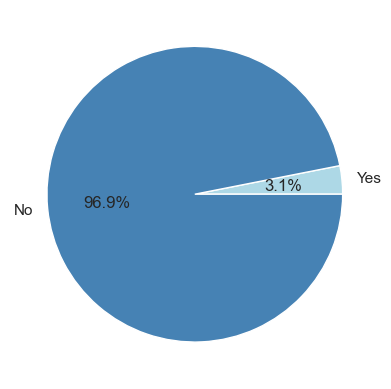

In [28]:
plt.pie(data, labels=required_car_space, autopct='%1.1f%%', colors=['Lightblue', 'Steelblue'])

plt.savefig('car.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# 96.9% indicated no need for car parking space, while 3.1% indicated need for car parking space.

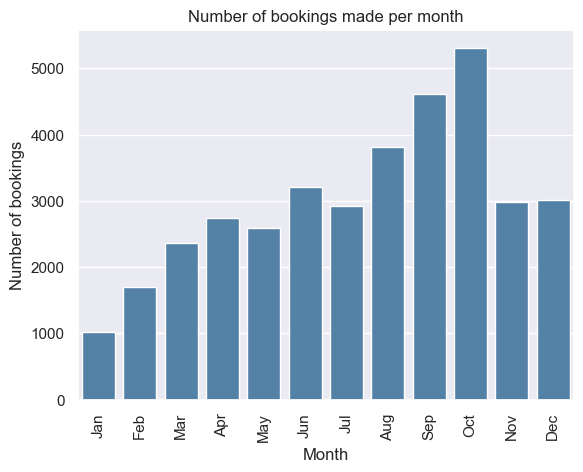

In [29]:
sns.countplot(x='arrival_month', data=df, color='Steelblue')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.title('Number of bookings made per month')
x = range(0, 12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, labels, rotation=90)

plt.savefig('month.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# October has the highest number of bookings with over 4000 bookings made, while the January has the least amount number of bookings.

In [ ]:
# Bivariate Analysis

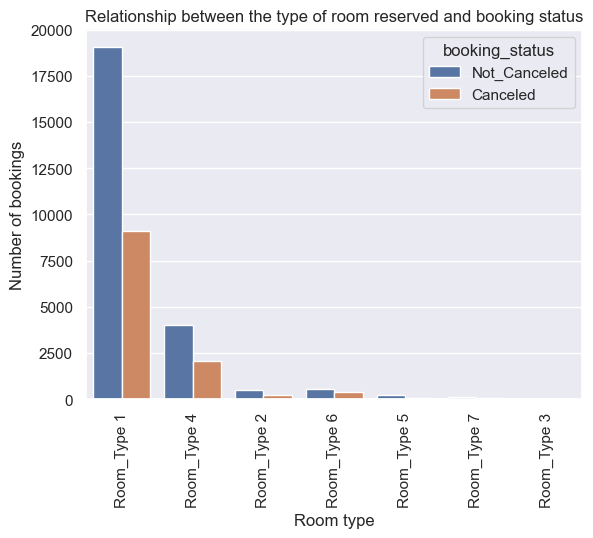

In [30]:
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.xticks(rotation=90)
plt.ylabel('Number of bookings')
plt.xlabel('Room type')
plt.title('Relationship between the type of room reserved and booking status')

plt.savefig('roomvstatus.png', bbox_inches='tight', dpi=300)
plt.show()

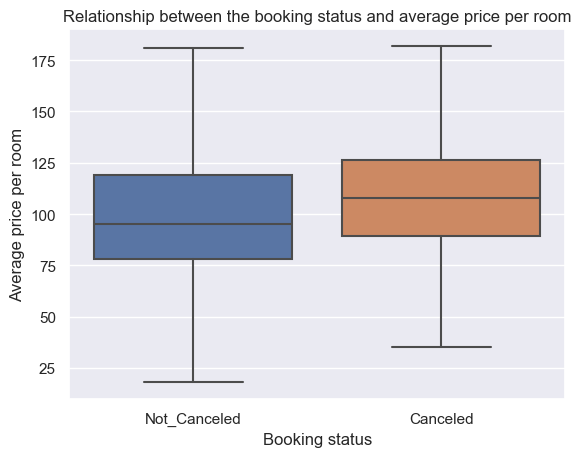

In [31]:
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df, sym='')
plt.xlabel('Booking status')
plt.ylabel('Average price per room')
plt.title('Relationship between the booking status and average price per room')


plt.savefig('pricevstatus.png', bbox_inches='tight', dpi=300)
plt.show()

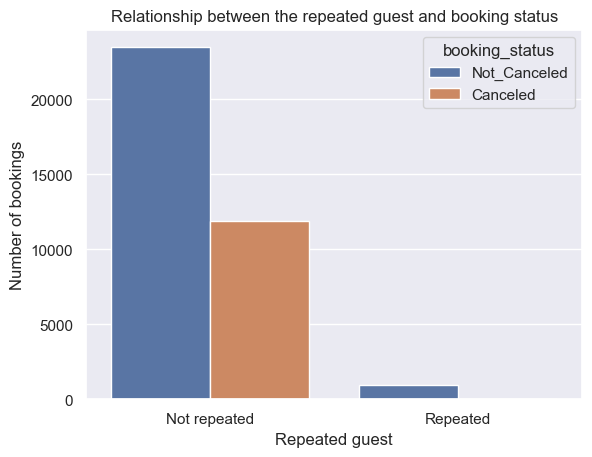

In [32]:
sns.countplot(x='repeated_guest',hue='booking_status', data=df)
plt.ylabel('Number of bookings')
plt.xlabel('Repeated guest')
plt.title('Relationship between the repeated guest and booking status')
x = range(2)
labels = ['Not repeated', 'Repeated']
plt.xticks(x, labels)


plt.savefig('repeatedvstatus.png', bbox_inches='tight', dpi=300)
plt.show()

In [33]:
df.groupby(['repeated_guest','booking_status'])[['booking_status']].count()

booking_status
repeated_guest booking_status                
0              Canceled                 11869
               Not_Canceled             23476
1              Canceled                    16
               Not_Canceled               914

In [34]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [ ]:
# Feature preprocessing


In [35]:
model_data = df.copy()

In [36]:
model_data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# Feature engineering

In [37]:
model_data['no_of_individuals'] = model_data['no_of_adults'] + model_data['no_of_children']

In [38]:
model_data['no_of_days_booked'] = model_data['no_of_weekend_nights'] + model_data['no_of_week_nights']

In [39]:
model_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_individuals,no_of_days_booked
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,2,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,2,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,1,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2,2


In [ ]:
# Feature encoding

In [40]:
cat_features = ['type_of_meal_plan','no_of_weekend_nights', 'room_type_reserved', 'market_segment_type']

In [41]:
lab = LabelEncoder()
for col in cat_features:
    model_data[col] = lab.fit_transform(model_data[col])

In [42]:
model_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_individuals,no_of_days_booked
0,INN00001,2,0,1,2,0,0,0,224,2017,...,2,3,0,0,0,65.00,0,Not_Canceled,2,3
1,INN00002,2,0,2,3,3,0,0,5,2018,...,6,4,0,0,0,106.68,1,Not_Canceled,2,5
2,INN00003,1,0,2,1,0,0,0,1,2018,...,28,4,0,0,0,60.00,0,Canceled,1,3
3,INN00004,2,0,0,2,0,0,0,211,2018,...,20,4,0,0,0,100.00,0,Canceled,2,2
4,INN00005,2,0,1,1,3,0,0,48,2018,...,11,4,0,0,0,94.50,0,Canceled,2,2


In [43]:
model_data['market_segment_type'].value_counts()

4    23214
3    10528
2     2017
1      391
0      125
Name: market_segment_type, dtype: int64

In [44]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [46]:
model_data['booking_status'] = model_data['booking_status'].replace({'Canceled':0, 'Not_Canceled':1})

In [47]:
model_data['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

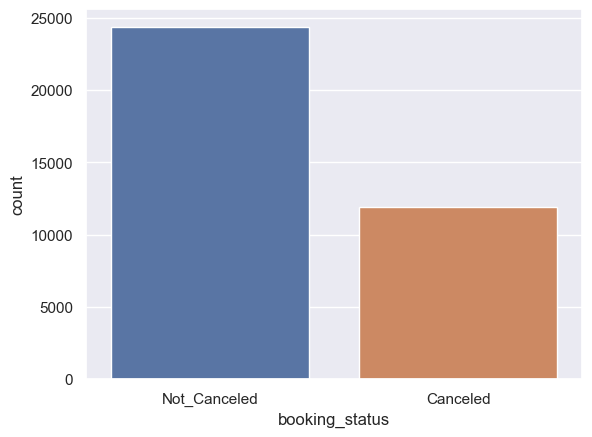

In [48]:
sns.countplot(x='booking_status', data=df)

plt.savefig('class.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Feature correlation

In [49]:
features = model_data.drop(['Booking_ID', 'booking_status'], axis=1)
features.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_individuals,no_of_days_booked
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,2,3
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,2,5
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,1,3
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,2,2
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,2,2


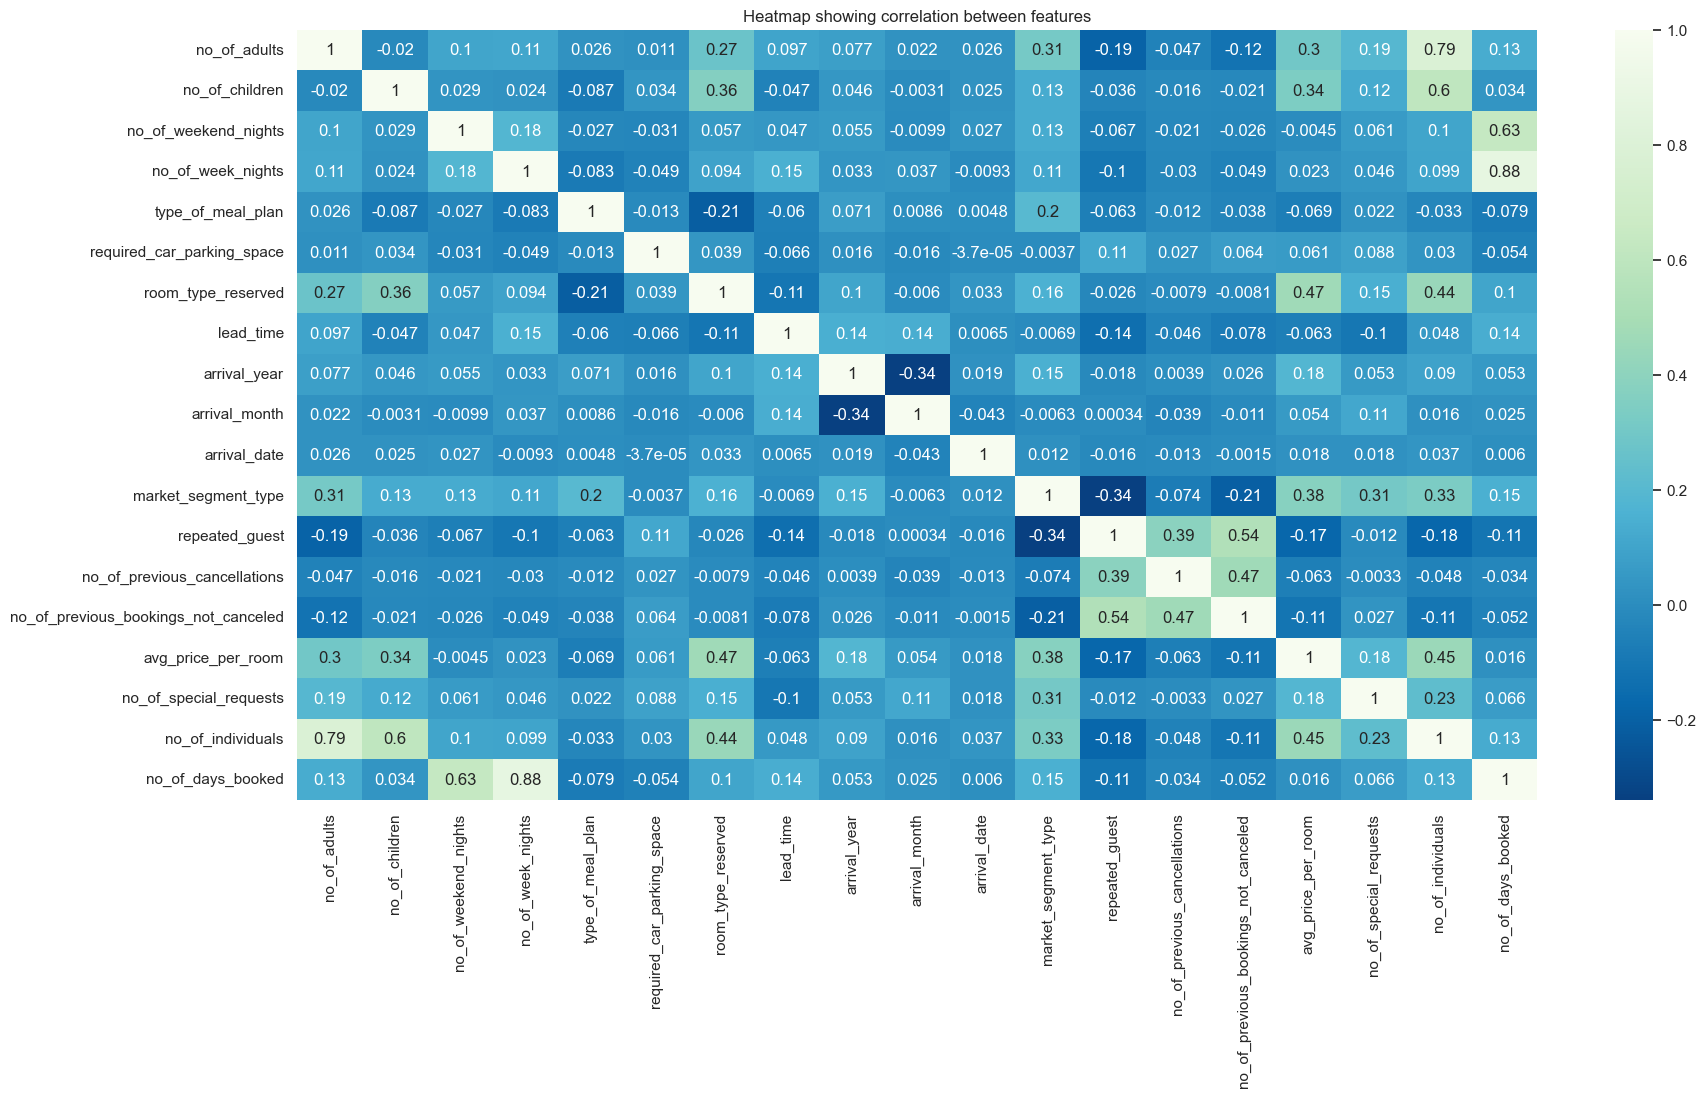

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(features.corr(), annot=True, cmap='GnBu_r')
plt.title('Heatmap showing correlation between features')
plt.savefig('corr.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Train-test split validation

In [ ]:
# The dataset is split into explanatory variables — X and target variable — y. Then, it further,
# split into train and test data in a ratio of 80:20 respectively. 
# Splitting the data helps to assess the model’s performance on unseen data after being trained on the training data.
# Scikit-learn’s train-test split is used to accomplish this task.

In [154]:
X = features
y = model_data['booking_status']

In [155]:
print(X.shape, y.shape)

(36275, 19) (36275,)


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29020, 19) (7255, 19) (29020,) (7255,)


# Feature scaling

In [ ]:
# Before going into modeling proper, the data needs to be scaled to handle skewed features.
# Scikit-learn’s standard scaler ensures that for each feature the mean is 0 and the variance is 1, bringing all the features to the same magnitude.
# Doing this will significantly affect the model’s performance.

In [158]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [ ]:
# 6. Modeling

# The hotel booking cancelations problem is a classification problem,
# Therefore about three classification models were trained and the optimal model was chosen.

In [159]:
f1scores = []

# Logistic Regression

In [160]:
logit = LogisticRegression()
logit.fit(scaledX_train, y_train)

LogisticRegression()

In [161]:
pred_logit = logit.predict(scaledX_test)
pred_logit

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [162]:
print(f'The accuracy score of the logistic regression model is {accuracy_score(y_test, pred_logit)}')

The accuracy score of the logistic regression model is 0.8056512749827704


In [163]:
print(f'The f1_score of the logistic regression model is {f1_score(y_test, pred_logit)}')
f1scores.append(f1_score(y_test, pred_logit))

The f1_score of the logistic regression model is 0.8606719367588934


In [164]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      2416
           1       0.82      0.90      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



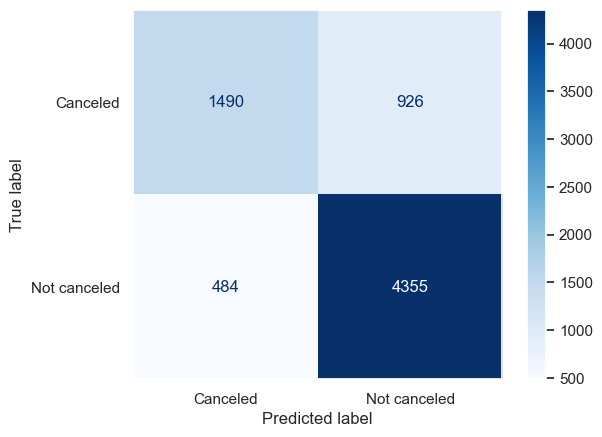

In [165]:
confusion_matrix_log = confusion_matrix(y_test, pred_logit)
cm_display_log = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_log, display_labels = ['Canceled', 'Not canceled'])
cm_display_log.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.savefig('logcm.png', bbox_inches='tight', dpi=300)
plt.show()

# DecisionTreeClassifier

In [166]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [167]:
forest = DecisionTreeClassifier(random_state = 1)
forest.fit(scaledX_train, y_train)

DecisionTreeClassifier(random_state=1)

In [168]:
pred_decision = forest.predict(scaledX_test)
pred_decision

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [169]:
print(f'The accuracy score of the Decision Tree model is {accuracy_score(y_test, pred_decision)}')

The accuracy score of the Decision Tree model is 0.8734665747760165


In [170]:
print(f'The f1_score of the DecisionTreeClassifier model is {f1_score(y_test, pred_decision)}')
f1scores.append(f1_score(y_test, pred_decision))

The f1_score of the DecisionTreeClassifier model is 0.9047520232413364


In [171]:
print(classification_report(y_test, pred_decision))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2416
           1       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



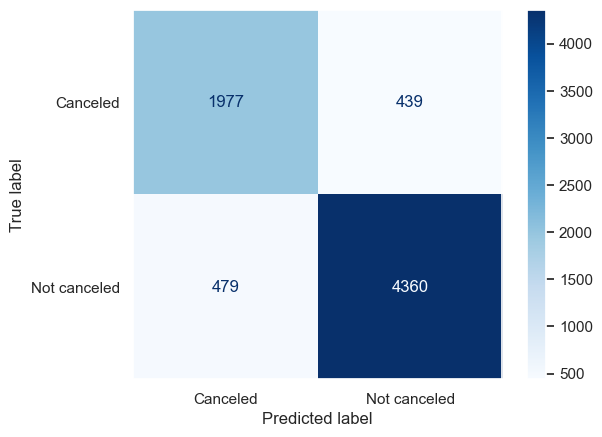

In [172]:
confusion_matrix_forest = confusion_matrix(y_test, pred_decision)
cm_display_forest = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_forest, display_labels = ['Canceled', 'Not canceled'])
cm_display_forest.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.savefig('forestcm.png', bbox_inches='tight', dpi=300)
plt.show()

# RandomForest

In [173]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(scaledX_train, y_train)

RandomForestClassifier(random_state=1)

In [174]:
pred_forest = forest.predict(scaledX_test)
pred_forest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [175]:
print(f'The accuracy score of the random forest model is {accuracy_score(y_test, pred_forest)}')

The accuracy score of the random forest model is 0.9061337008959338


In [176]:
print(f'The f1_score of the random forest model is {f1_score(y_test, pred_forest)}')
f1scores.append(f1_score(y_test, pred_forest))

The f1_score of the random forest model is 0.9309260574094737


In [177]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.91      0.91      0.91      7255



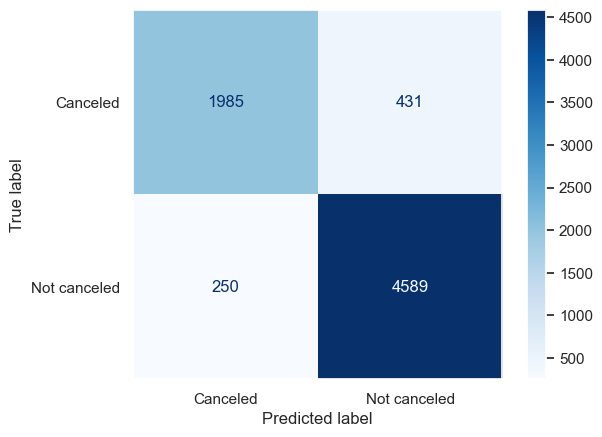

In [178]:
confusion_matrix_forest = confusion_matrix(y_test, pred_forest)
cm_display_forest = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_forest, display_labels = ['Canceled', 'Not canceled'])
cm_display_forest.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.savefig('forestcm.png', bbox_inches='tight', dpi=300)
plt.show()

In [179]:
models = ['Logistic Regression', 'Random Forest','decision_tree']
print(f1scores)

[0.8606719367588934, 0.9047520232413364, 0.9309260574094737]


In [180]:
models_scores = list(zip(models, f1scores))
evaluation = pd.DataFrame(models_scores, columns=['Model', 'F1score'])
evaluation

,Model,F1score
0,Logistic Regression,0.860672
1,Random Forest,0.904752
2,decision_tree,0.930926


# Conclusion

In [ ]:
# 1. Regularised models and trees do not get impacted by outliers, hence the models show goodresults despite some outliers in the data

In [ ]:
# 2.After gridSearch and hyperparameter tunnig we found Random Forest is the best model inindentifying whether a user cancelled his booking or not.

In [ ]:
# 3. Random Forest worked the best because it adds regularization to the loss function to reducemodel complexity and increase generalisation.

In [ ]:
# 4. We adjusted the model weights due to class imbalance in target variable. Our final modelhas a overall balanced accuracy score 0.930926

In [ ]:
# 5. It classifies 85% of the users who cancelled correctly and 91% who did not cancel correctly.

In [ ]:
# 1.10 How can this model be used?

In [ ]:
# 1.1 This model will be helpful in highlighting the bookings which have high propensity ofcancellation

In [ ]:
#1.2 The hotels can use this model to impose high cancellation fee on bookings which the model has detected as likely to be cancelled. This will discourage the customer from cancelling or thebooking will be done by a user who is less likely to cancel